# Assessment and User Analysis

As online learning is getting more and more popular, E-Learning platforms are growing and they're generating alot of data as a result. The produced data may be about their users, their learning checks, or both. 

When organizations analyze their assessment data, they may identify trends and patterns such as most missed questions and identifying key modes of central tendencies for a given assessment. They may then use that information to tweak their assessments to help their users succeed in the future.

When organizations analyze their user data, they may make use of certain characteristics such as where they are from to them with an adequate learning environment to help them assist with their learning.  

## Summary of Results

Upon completion of this analysis, we are able to determine the following results:
<ul> 
<li> 245 people have made a zero across all assessments </li>
<li> Roughly 81% of people would recommend this to friends </li>
<li> Nearly half of the users are from the United States
<li> Roughly 84% are satisfied with the assessment they took
<li> On average, the longest time a user took on an assessment 26.4 minutes and that was the Troubleshoot Multi-tier Applications assessment</li>
<li> On average, the shortest time a user took on an assessment was 17 minutes and that was the Implementing Backup Strategies assessment</li>
</ul>

The following details the steps we took to determine the above. Please read through this following document and it provides the methods we used to determine the above key results.

In [1]:
# import data analysis libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline


# display all column headers
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# Set Pandas Dataframes via relative path
events = pd.read_csv("AssessmentRealTimeEventsForCodeTest.csv")
score = pd.read_csv("AssessmentScoreForCodeTest.csv")
dump = pd.read_csv("UsersDumpForCodeTest.csv")
survey = pd.read_csv("UserSurveyResultsForCodeTest.csv")

In [2]:
# peak at events
events.head()

,TestID,assessmentname,eventcode,timestamp
0,3602,"High Availability, Fault Tolerance, and Scalab...",STRASMNT,2017-07-20 12:30:31.000
1,3602,"High Availability, Fault Tolerance, and Scalab...",VIEWASMTDIAG,2017-07-20 12:30:32.000
2,3652,"High Availability, Fault Tolerance, and Scalab...",STRASMNT,2017-07-20 19:01:25.000
3,3652,"High Availability, Fault Tolerance, and Scalab...",VIEWASMTDIAG,2017-07-20 19:01:25.000
4,3707,Implement Elastic Beanstalk Solutions,STRASMNT,2017-07-21 00:02:41.000


In [3]:
# peak at score
score.head()

,TestId,UserId,assessment_name,score
0,3451,1824,"High Availability, Fault Tolerance, and Scalab...",6.580000
1,3453,1825,"High Availability, Fault Tolerance, and Scalab...",0.000000
2,3450,1823,"High Availability, Fault Tolerance, and Scalab...",73.699997
3,3454,1826,"High Availability, Fault Tolerance, and Scalab...",95.209999
4,3457,1826,VPC and VPC Networking,100.000000


In [4]:
# peak at survey
survey.head()

,TestID,question,answer
0,3527,"Please rate this assessment from one to five, ...",5
1,3527,What did you love about Cloud Assessments and ...,i would love to see my skills
2,3527,Why did you rate it the way you did?,8
3,3527,Did you understand what was expected of you (w...,yes
4,3527,Was the skill level appropriate for what we de...,9


In [5]:
# peak at dump
dump.head()

,UserId,country,certifications
0,1,No Value Provided,[]
1,1011,Texas Republic,"[""aws_developer"", ""aws_devops_engineer""]"
2,1009,United States,"[""aws_developer""]"
3,1016,United States,"[""aws_developer""]"
4,1024,No Value Provided,[]


In [6]:
score = score.dropna() # drops null values in the score df and reassigns it to score

## To start off, we'll perform the following:

<ol>
<li> Filter the existing 'score' df to see how many users scored within a certain range across all assessments.</li>
<li> Calculate the percentage of people of made a score within a given range out of all the scores.</li>
</ol>

In [7]:
score_0 = score[score["score"] == 0]

score_0.shape[0]

245

In [8]:
score_0.shape[0] / score.shape[0]

0.4246100519930676

In [9]:
score_l50 = score[(score["score"] < 50) & (score["score"] > 0)]  

score_l50.shape[0]

90

In [10]:
score_l50.shape[0] / score.shape[0]

0.1559792027729636

In [11]:
score_fs = score[(score["score"] < 70) & (score["score"] >= 50)]

score_fs.shape[0]

52

In [12]:
score_fs.shape[0] / score.shape[0]

0.09012131715771231

In [13]:
score_c = score[(score["score"] < 80) & (score["score"] >= 70)]

score_c.shape[0]

32

In [14]:
score_c.shape[0] / score.shape[0]

0.05545927209705372

In [15]:
score_b = score[(score["score"] < 90) & (score["score"] >= 80)]

score_b.shape[0]

32

In [16]:
score_b.shape[0] / score.shape[0]

0.05545927209705372

In [17]:
score_a = score[(score["score"] < 100) & (score["score"] >= 90)]

score_a.shape[0]

50

In [18]:
score_a.shape[0] / score.shape[0]

0.08665511265164645

In [19]:
score_100 = score[score["score"] == 100]

score_100.shape[0]

76

In [20]:
score_100.shape[0] / score.shape[0]

0.1317157712305026

From the above, we see the following:
<ul>
<li> 245 (~42.5%) people made a score of zero</li>
<li> 90 (~15.6%) people made a score between 0 and 50</li>
<li> 52 (~9%) people made a score between 50 and 70</li>
<li> 32 (~5.5%) people made a score between 70 and 80</li>
<li> 32 (~5.5%) people made a score between 80 and 90</li>
<li> 50 (~8.7%) people made a score between 90 and 100</li>
<li> 76 (~13.2%) people made a score of 100</li>
</ul>

It's certainly alarming that almost half of the people made a score of zero across all assessments. 

Assuming the pass/no pass cutoff point is 80%, it is also alarming that the number of people who made a zero is greater than the number who pass the assessment. 

# We'll perform the following steps for some explatory statistics
<ol>
<li> Create a Box and Whisker Plot that describes the assessment scores located in the `score` dataframe </li>
<li> Calculate some additional explatory statistics beyond what the Box and Whisker Plot shows </li>
</ol>

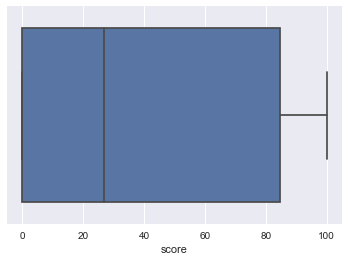

In [21]:
sns.boxplot(score["score"])

In [22]:
var = score["score"].var()
std = score["score"].std()
mean = score["score"].mean()
med = score["score"].median()
max = score["score"].max()
min = score["score"].min()
Q3 = np.percentile(score["score"], 75)
Q1 = np.percentile(score["score"], 25)
IQR = Q3 - Q1
Q1O = Q1 - 1.5 * IQR 
Q1EO = Q1 - 3 * IQR
Q3O = Q3 + 1.5 * IQR
Q3EO = Q3 + 3 * IQR

print("The mean score is {}".format(mean))
print("The median score is {}".format(med))
print("The maximum score is {}".format(max))
print("The minimum score is {}".format(min))
print("The variance between the scores is {}".format(var))
print("The standard deviation of the squres is {}".format(std))
print("The Third Quartile is {}".format(Q3))
print("The First Quartile is {}".format(Q1))
print("The Interquartile Range is {}".format(IQR))
print("The outliers are below {}".format(Q1O))
print("The extreme outliers are below {}".format(Q1EO))
print("The outliers are above {}".format(Q3O))
print("The extreme outliers are above {}".format(Q3EO))

The mean score is 40.00133433686482
The median score is 26.67000008
The maximum score is 100.0
The minimum score is 0.0
The variance between the scores is 1688.141559245361
The standard deviation of the squres is 41.086999881292876
The Third Quartile is 84.63999939
The First Quartile is 0.0
The Interquartile Range is 84.63999939
The outliers are below -126.95999908499999
The extreme outliers are below -253.91999816999999
The outliers are above 211.599998475
The extreme outliers are above 338.55999756


Considering we are observing assessment scores, negative values and values above 100 doesn't make any sense. That said, for all intents and purposes, there are no outliers of any kind. 

Remembering the fact that almost half of observations have a score of 0, it is not surprising the first quartile is 0.

## Next we'll work on the `survey` dataframe by:
<ol> 
<li>Inspect the `question` column to return an array with all of the unique questions in the column.</li>
<li>Filter the dataframe to return rows that contain the string regarding the likelihood the user will recommend the assessment to friends.</li>
</ol>

In [23]:
pd.unique(survey["question"])

array(['Please rate this assessment from one to five, five being the highest',
       'What did you love about Cloud Assessments and this assessment in particular?',
       'Why did you rate it the way you did?',
       'Did you understand what was expected of you (was the scenario clear)?',
       'Was the skill level appropriate for what we described?',
       'On a scale of one to ten, how likely are you to recommend this to your friends?',
       'Do you have any specific suggestions for improvements?',
       'What additional features would you like to see?',
       'What other types of assessments would you like to see?',
       'Would you be interested in a verified micro certification?'], dtype=object)

In [24]:
recommend = survey[survey.question.str.contains('On a scale of one to ten, how likely are you to recommend this to your friends?')].copy()

In [25]:
recommend.head()

,TestID,question,answer
5,3527,"On a scale of one to ten, how likely are you t...",10
15,3527,"On a scale of one to ten, how likely are you t...",10
25,3527,"On a scale of one to ten, how likely are you t...",10
35,3522,"On a scale of one to ten, how likely are you t...",10
45,3521,"On a scale of one to ten, how likely are you t...",10


In [26]:
recommend.dtypes # Returns the dtypes of a Dataframee

TestID       int64
question    object
answer      object
dtype: object

In [27]:
recommend["answer"] = pd.to_numeric(recommend["answer"]) # Converts the Series to `as_numeric`

In [28]:
recommend.dtypes # Making sure I'm not crazy

TestID       int64
question    object
answer       int64
dtype: object

In [29]:
perec = recommend[recommend["answer"] == 10].shape[0]
perecp = round(perec / recommend.shape[0] * 100, 2)

rec9 = recommend[recommend["answer"] == 9].shape[0]
rec9p = round(rec9 / recommend.shape[0] * 100, 2)

rec8 = recommend[recommend["answer"] == 8].shape[0]
rec8p = round(rec8 / recommend.shape[0] * 100, 2)

rec7 = recommend[recommend["answer"] == 7].shape[0]
rec7p = round(rec7 / recommend.shape[0] * 100, 2)

rec6 = recommend[recommend["answer"] == 6].shape[0]
rec6p = round(rec6 / recommend.shape[0] * 100, 2)

rec5 = recommend[recommend["answer"] == 5].shape[0]
rec5p = round(rec5 / recommend.shape[0] * 100, 2)

rec4 = recommend[recommend["answer"] == 4].shape[0]
rec4p = round(rec4 / recommend.shape[0] * 100, 2)

rec3 = recommend[recommend["answer"] == 3].shape[0]
rec3p = round(rec3 / recommend.shape[0] * 100, 2)

rec2 = recommend[recommend["answer"] == 2].shape[0]
rec2p = round(rec2 / recommend.shape[0] * 100, 2)

rec1 = recommend[recommend["answer"] == 1].shape[0]
rec1p = round(rec1 / recommend.shape[0] * 100, 2)

In [30]:
scale = [x for x in range(1,11)]
recscale = [rec1, rec2, rec3, rec4, rec5, rec6, rec7, rec8, rec9, perec]

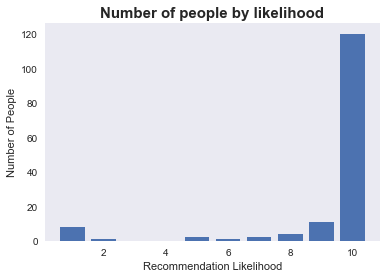

In [72]:
plt.bar(scale, recscale)
plt.title("Number of people by likelihood", weight = 'bold', fontsize = 15)
plt.xlabel("Recommendation Likelihood")
plt.ylabel("Number of People")
plt.grid(False)

In [32]:
print("The number people who are extremely likely to recommend this to a friend is {} ({}%)".format(perec, perecp))

print("The number people who are most likely to recommend this to a friend is {} ({}%)".format(rec9, rec9p))

print("The number people who are really likely to recommend this to a friend is {} ({}%)".format(rec8, rec8p))

print("The number people who are kind of likely to recommend this to a friend is {} ({}%)".format(rec7, rec7p))

print("The number people who maybe recommend this to a friend is {} ({}%)".format(rec6, rec6p))

print("The number people who are indifferent to recommend this to a friend is {} ({}%)".format(rec5, rec5p))

print("The number people who are hesitant to recommend this to a friend is {} ({}%)".format(rec4, rec4p))

print("The number people who are most likely not to recommend this to a friend is {} ({}%)".format(rec3, rec3p))

print("The number people who are extremely not likely recommend this to a friend is {} ({}%)".format(rec2, rec2p))

print("The number people who are would not recommend this to a friend is {} ({}%)".format(rec1, rec1p))

The number people who are extremely likely to recommend this to a friend is 120 (80.54)
The number people who are most likely to recommend this to a friend is 11 (7.38%)
The number people who are really likely to recommend this to a friend is 4 (2.68%)
The number people who are kind of likely to recommend this to a friend is 2 (1.34%)
The number people who maybe recommend this to a friend is 1 (0.67%)
The number people who are indifferent to recommend this to a friend is 2 (1.34%)
The number people who are hesitant to recommend this to a friend is 0 (0.0%)
The number people who are most likely not to recommend this to a friend is 0 (0.0%)
The number people who are extremely not likely recommend this to a friend is 1 (0.67%)
The number people who are would not recommend this to a friend is 8 (5.37%)


### Next, we'll inspect the `dump` dataframe and the unique values in the country column

In [33]:
pd.unique(dump["country"])

array(['No Value Provided', 'Texas Republic', 'United States', 'USA', 'US',
       'united states', 'Ireland', 'Ukraine', 'United Kingdom', 'Canada',
       'India', 'Estados Unidos', 'Venezuela', 'venezuela', 'Mexico',
       'France', 'England', 'Spain', 'United States of America', 'Brazil',
       'Colombia', 'Romania', 'Argentina', 'Australia', 'UK',
       'Philippines', 'New Zealand', 'Vietnam', 'australia', 'Italia',
       'NIGERIA', 'Russia', 'Poland', 'Israel', 'Netherlands', 'Paraguay',
       'Croatia', 'Indonesia', 'Taiwan', 'usa', 'uk', 'Scotland',
       'South Africa', 'Kenya', 'Germany', 'Japan', 'USA ', 'Usa', 'japan',
       'UAE', 'INDIA', 'the Netherlands', 'Netherlands ', 'Switzerland',
       'Austria ', 'Russian Federation', 'Bulgaria', 'Nederland',
       ' Ireland', 'Denmark', 'Saudi Arabia', 'Cyprus', 'Ind', 'Sweden',
       'Canda', 'Arlington', 'Harris', 'Unisted States', 'Sri Lanka',
       'London', 'Belgium', 'Singapore', 'Bahrain', 'Bosnia', 'Austrsalia

### Using the unique values, we'll create a mapping dictionary to clean the `country` column

In [34]:
coumap = {
    "Texas Republic" : "Texas",
    "USA" : "United States",
    "US" : "United States",
    "united states" : "United States",
    "No Value Provided" : np.nan,
    "Texas Republic" : "United States",
    "United States" : "United States",
    "Ireland" : "Ireland", 
    "Ukraine" : "Ukraine", 
    "United Kingdom" : "United Kingdom", 
    "Canada" : "Canada",
    "India" : "India", 
    "Estados Unidos" : "United States", 
    "Venezuela" : "Venezuela", 
    "venezuela": "Venezuela", 
    "Mexico" : "Mexico",
    "France" : "France", 
    "England" : "England", 
    'Spain' : "Spain", 
    'United States of America' : "United States", 
    'Brazil' : "Brzail",
    'Colombia' : "Columbia", 
    'Romania' : "Romania", 
    'Argentina' : "Argentina", 
    'Australia' : "Austrailia", 
    'UK' : "United Kingdom",
    'Philippines' : "Philippines",
    'New Zealand' : "New Zealand",
    'Vietnam' : "Vietnam",
    'australia' : "Austrailia",
    'Italia' : "Italy",
    'NIGERIA' : "Nigeria",
    'Russia' : "Russia",
    'Poland' : "Poland",
    'Israel' : "Israel",
    'Netherlands' : "Netherlands",
    'Paraguay' : "Paraguay",
    'Croatia' : "Croatia",
    'Indonesia' : "Indonesia",
    'Taiwan' : "Taiwan", 
    'usa' : "United States", 
    'uk' : "United Kingdom", 
    'Scotland' : "Scotland",
    'South Africa' : "South Africa",
    'Kenya' : "Kenya",
    'Germany' : "Germany",
    'Japan' : "Japan",
    'USA ': "United States",
    'Usa' : "United States",
    'japan' : "Japan",
    'UAE' : "United Arab Emirates",
    'INDIA' : "India",
    'the Netherlands' : "Netherlands",
    'Netherlands ' : "Netherlands",
    'Switzerland' : "Switzerland",
    'Austria ' : "Austria",
    'Russian Federation' : "Russia",
    'Bulgaria' : "Bulgaria",
    'Nederland' : "Netherlands",
    ' Ireland' : "Ireland",
    'Denmark' : "Denmark",
    'Saudi Arabia' : "Saudi Arabia",
    'Cyprus' : "Cyprus",
    'Ind' : "India", 
    'Sweden' : "Sweeden",
    'Canda' : "Canada",
    'Arlington' : "United States",
    'Harris' : "United States",
    'Unisted States' : "United States", 
    'Sri Lanka' : "Sri Lanka",
    'London' : "London",
    'Belgium' : "Belgium",
    'Singapore' : "Singapore",
    'Bahrain' : "Bahrain",
    'Bosnia': "Bosnia and Herzegovina",
    'Austrsalia' : "Austrailia",
    'Malaysia' : "Malaysis",
    'Slovakia' : "Slovakia",
    'Suomi' : "Finland",
    'China' : "China",
    'Unkted Kingdom' : "United Kingdom",
    'Guatemala' : "Guatemala",
    'Deutschland' : "Germany",
    'italy' : "Italy",
    'united kingdom' : "United Kingdom",
    'k' : np.nan,
    'india' : "India",
    'Peru' : "Peru", 
    'Uk' : "United Kingdom",
    'Ecuador' : "Ecuador",
    'Lithuania' : "Lithuania",
    'Saudi Arabi' : "Saudi Arabia",
    'Morocco' : "Morocco",
    'Cambodia' : "Cambodia",
    'Serbia' : "Serbia",
    'Moldova' : "Moldova",
    'United Arab Emirates' : "United Arab Emirates",
    'Nepal' : "Nepal",
    'Chile' : "Chile",
    'Hong Kong SAR, China' : "China",
    'Lebanon' : "Lebanon", 
    'united state' : "United States",
    'MYANMAR' : "Myanmar", 
    'Italy' : "Italy", 
    'U.S.A.' : "United States", 
    'Pakistan' : "Pakistan", 
    'Bangladesh' : "Bangladesh", 
    'asdfasdf' : np.nan,
    'Jordan' : "Jordan",
    'Nigeria' :  "Nigeria", 
    'Belarus' : "Belarus", 
    'Brasil' : "Brazil", 
    'Egypt' : "Egypt", 
    'Kiev' : "Ukraine",
    'Albania' : "Albania", 
    'france' : "France", 
    'Bosnia and Herzegovina' : "Bosnia and Herzegovina", 
    'Austria' : "Austria", 
    'Norway' : "Norway",
    'Espa̱a' : "Spain", 
    'asdf' : np.nan, 
    'Turkey' : "Turkey", 
    'Greece' : "Greece", 
    'PK' : "Pakistan", 
    'PAKISTAN' : "Pakistan", 
    'germany' : "Germany",
    'Costa Rica' : "Costa Rica", 
    'Finland' : "Finland", 
    'sambalpur' : "India", 
    'Timor Leste' : "Timor Leste", 
    'Pune' : "India",
    'mexico' : "Mexico", 
    'Ie' : "Ireland", 
    'aaa' : np.nan, 
    'Senegal' : "Senegal", 
    'United Kindom' : "United Kingdom", 
    'us' : "United States", 
    'Viet Nam' : "Vietnam",
    'Belgique' : "Belgium", 
    'Solomon Islands' : "Solomon Islands",
    'Midlothian' : "United States",
    'CANADA' : "Canada",
    'IND' : "India",
    'india ' : "India", 
    'Macao' : "Morocco", 
    'United states' : "United States", 
    'Oman' : "Oman", 
    'egypt' : "Egypt", 
    'MEXICO ' : "Mexico", 
    'u' : np.nan, 
    'Portugal' : "Portugal", 
    'Trinidad and Tobago' : "Trinidad and Tobogo"
}

In [35]:
dump["country"] = dump["country"].map(coumap) # Applying thee mapping dictionary to the column 

In [36]:
pd.unique(dump["country"]) #Again, making sure I'm not crazy

array([nan, 'United States', 'Ireland', 'Ukraine', 'United Kingdom',
       'Canada', 'India', 'Venezuela', 'Mexico', 'France', 'England',
       'Spain', 'Brzail', 'Columbia', 'Romania', 'Argentina', 'Austrailia',
       'Philippines', 'New Zealand', 'Vietnam', 'Italy', 'Nigeria',
       'Russia', 'Poland', 'Israel', 'Netherlands', 'Paraguay', 'Croatia',
       'Indonesia', 'Taiwan', 'Scotland', 'South Africa', 'Kenya',
       'Germany', 'Japan', 'United Arab Emirates', 'Switzerland',
       'Austria', 'Bulgaria', 'Denmark', 'Saudi Arabia', 'Cyprus',
       'Sweeden', 'Sri Lanka', 'London', 'Belgium', 'Singapore', 'Bahrain',
       'Bosnia and Herzegovina', 'Malaysis', 'Slovakia', 'Finland',
       'China', 'Guatemala', 'Peru', 'Ecuador', 'Lithuania', 'Morocco',
       'Cambodia', 'Serbia', 'Moldova', 'Nepal', 'Chile', 'Lebanon',
       'Myanmar', 'Pakistan', 'Bangladesh', 'Jordan', 'Belarus', 'Brazil',
       'Egypt', 'Albania', 'Norway', 'Turkey', 'Greece', 'Costa Rica',
       'Tim

In [37]:
dump = dump.dropna() # Drop all null values

In [38]:
dump["country"].value_counts() # Returns the number of times a single country appears in the column

United States             435
India                     233
United Kingdom             73
Austrailia                 32
Canada                     23
Germany                    19
Spain                      17
Mexico                     12
Ireland                    12
Netherlands                11
Ukraine                    11
Brzail                     10
Poland                      8
Russia                      7
France                      7
Brazil                      6
Romania                     6
Philippines                 6
United Arab Emirates        6
Pakistan                    5
Venezuela                   5
China                       5
Israel                      5
Vietnam                     5
Malaysis                    5
South Africa                4
New Zealand                 4
Turkey                      4
Japan                       4
Bangladesh                  4
Singapore                   4
Italy                       4
Croatia                     4
Indonesia 

In [39]:
dump["country"].value_counts().sum() # Calculates sum of users in every country listed in the Series

1079

In [40]:
dump["country"].value_counts() / dump["country"].value_counts().sum() 
# Returns the percentage of users in a single country

United States             0.403151
India                     0.215941
United Kingdom            0.067655
Austrailia                0.029657
Canada                    0.021316
Germany                   0.017609
Spain                     0.015755
Mexico                    0.011121
Ireland                   0.011121
Netherlands               0.010195
Ukraine                   0.010195
Brzail                    0.009268
Poland                    0.007414
Russia                    0.006487
France                    0.006487
Brazil                    0.005561
Romania                   0.005561
Philippines               0.005561
United Arab Emirates      0.005561
Pakistan                  0.004634
Venezuela                 0.004634
China                     0.004634
Israel                    0.004634
Vietnam                   0.004634
Malaysis                  0.004634
South Africa              0.003707
New Zealand               0.003707
Turkey                    0.003707
Japan               

## We'll return to working on the `survey` dataframe by:
<ol> 
<li>Inspect the `question` column to return an array with all of the unique questions in the column.</li>
<li>Filter the dataframe to return rows that contain the string asking the user to rate the assessment.</li>
</ol>

In [41]:
rate = survey[survey.question.str.contains('Please rate this assessment from one to five, five being the highest')].copy()

In [42]:
rate.head()

,TestID,question,answer
0,3527,"Please rate this assessment from one to five, ...",5
10,3527,"Please rate this assessment from one to five, ...",5
20,3527,"Please rate this assessment from one to five, ...",5
30,3522,"Please rate this assessment from one to five, ...",5
40,3521,"Please rate this assessment from one to five, ...",5


In [43]:
rate.dtypes # Check the dtypes of the rate dataframe

TestID       int64
question    object
answer      object
dtype: object

In [44]:
rate["answer"] = pd.to_numeric(rate["answer"]) # Converting the answer Series to numeric

In [45]:
rate.dtypes # Making sure I'm not crazy

TestID       int64
question    object
answer       int64
dtype: object

In [46]:
rate["answer"].mean()

4.624161073825503

In [47]:
rate1p = round(rate[rate["answer"] == 1].shape[0] / rate.shape[0] * 100, 2)
rate1 = rate[rate["answer"] == 1].shape[0]

rate2p = round(rate[rate["answer"] == 2].shape[0] / rate.shape[0] * 100, 2)
rate2 = rate[rate["answer"] == 2].shape[0]

rate3p = round(rate[rate["answer"] == 3].shape[0] / rate.shape[0] * 100, 2)
rate3 = rate[rate["answer"] == 3].shape[0]

rate4p = round(rate[rate["answer"] == 4].shape[0] / rate.shape[0] * 100, 2)
rate4 = rate[rate["answer"] == 4].shape[0]

rate5p = round(rate[rate["answer"] == 5].shape[0] / rate.shape[0] * 100, 2)
rate5 = rate[rate["answer"] == 5].shape[0]

In [48]:
print("The number of people who rated this assigmnet a 5 is {} ({}%)".format(rate5, rate5p))

print("The number of people who rated this assigmnet a 4 is {} ({}%)".format(rate4, rate4p))

print("The number of people who rated this assigmnet a 3 is {} ({}%)".format(rate3, rate3p))

print("The number of people who rated this assigmnet a 2 is {} ({}%)".format(rate2, rate2p))

print("The number of people who rated this assigmnet a 1 is {} ({}%)".format(rate1, rate1p))

The number of people who rated this assigmnet a 5 is 125 (83.89%)
The number of people who rated this assigmnet a 4 is 11 (7.38%)
The number of people who rated this assigmnet a 3 is 3 (2.01%)
The number of people who rated this assigmnet a 2 is 1 (0.67%)
The number of people who rated this assigmnet a 1 is 9 (6.04%)


In [49]:
rscale = [x for x in range(1,6)]
numpeo = [rate1, rate2, rate3, rate4, rate5]

In [50]:
print(rscale, numpeo) # Making sure the list compresion and the list declaration worked

[1, 2, 3, 4, 5] [9, 1, 3, 11, 125]


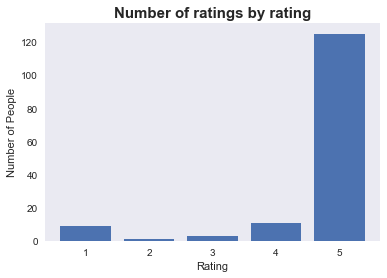

In [73]:
plt.bar(rscale, numpeo)
plt.xlabel("Rating")
plt.ylabel("Number of People")
plt.title("Number of ratings by rating", weight = 'bold', fontsize = 15)
plt.grid(False)

### We're returning to the `score` dataframe and doing the following:

<ul>
<li> Filter down the `assessment_name` column to return the rows of the `score` dataframe containing the name of each assessment and assigning that to its own dataframe </li>
<li> Create a Box and Whisker Plot that describes the each assessment scores located in the newly created dataframes</li>
<li> Use the `.describe()` method to display some basic statistics for the `score` column of each newly created dataframes</li>
</ul>

In [52]:
pd.unique(score["assessment_name"])

array(['High Availability, Fault Tolerance, and Scalability',
       'VPC and VPC Networking', 'Design and Implement S3 Solutions',
       'Troubleshoot Multi-Tier Applications',
       'Implement Elastic Beanstalk Solutions',
       'Implementing Backup Strategies'], dtype=object)

In [53]:
HAFTS = score[score.assessment_name.str.contains('High Availability, Fault Tolerance, and Scalability')].copy()

VPC = score[score.assessment_name.str.contains('VPC and VPC Networking', 'Design and Implement S3 Solutions')].copy()

TMMA = score[score.assessment_name.str.contains('Troubleshoot Multi-Tier Applications')].copy()

IEBS = score[score.assessment_name.str.contains('Implement Elastic Beanstalk Solutions')].copy()

IBS = score[score.assessment_name.str.contains('Implementing Backup Strategies')].copy()

DIS = score[score.assessment_name.str.contains('Design and Implement S3 Solutions')].copy()

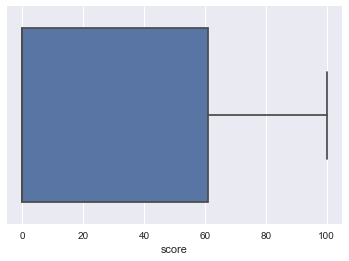

In [54]:
sns.boxplot(HAFTS["score"])

In [55]:
HAFTS["score"].describe()

count    227.000000
mean      23.962995
std       38.595826
min        0.000000
25%        0.000000
50%        0.000000
75%       61.050001
max      100.000000
Name: score, dtype: float64

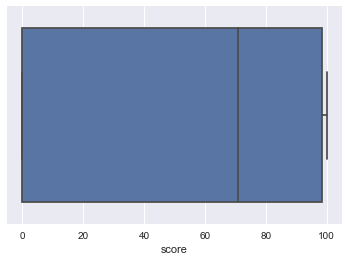

In [56]:
sns.boxplot(VPC["score"])

In [57]:
VPC["score"].describe()

count     86.000000
mean      56.860000
std       42.348337
min        0.000000
25%        0.000000
50%       70.830002
75%       98.542500
max      100.000000
Name: score, dtype: float64

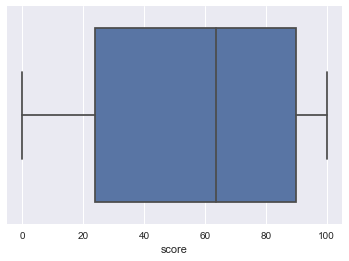

In [58]:
sns.boxplot(TMMA["score"])

In [59]:
TMMA["score"].describe()

count    45.000000
mean     55.586222
std      36.211001
min       0.000000
25%      24.000000
50%      63.540001
75%      89.989998
max      99.989998
Name: score, dtype: float64

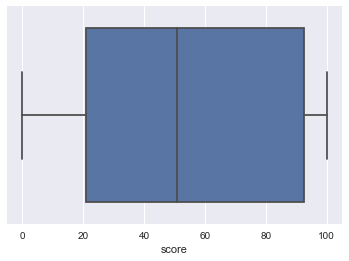

In [60]:
sns.boxplot(IEBS["score"])

In [61]:
IEBS["score"].describe()

count     93.000000
mean      51.884624
std       37.575058
min        0.000000
25%       20.840000
50%       50.840000
75%       92.500000
max      100.000000
Name: score, dtype: float64

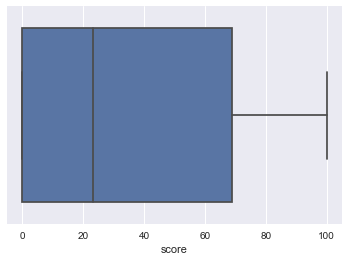

In [62]:
sns.boxplot(IBS["score"])

In [63]:
IBS["score"].describe()

count     57.000000
mean      32.961929
std       35.945481
min        0.000000
25%        0.000000
50%       23.340000
75%       68.889999
max      100.000000
Name: score, dtype: float64

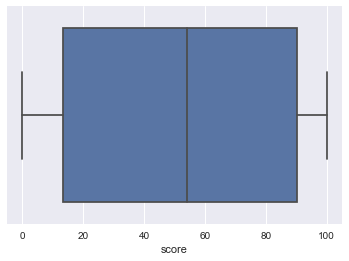

In [66]:
sns.boxplot(DIS["score"])

In [67]:
DIS["score"].describe()

count     69.000000
mean      51.387391
std       39.232317
min        0.000000
25%       13.340000
50%       54.139999
75%       90.349998
max      100.000000
Name: score, dtype: float64

# Question 2: Return the average time taken for each assessment. Group by assessment name

```
SELECT z.assessmentname as "Assessment",
	   AVG(z.elapsedtime)/60 as "Average Minutes"
FROM
(
SELECT e1."TestID",
	   e1.assessmentname, 
	   e1.eventcode,
       e1.timestamp,
       e2."TestID",
       e2.eventcode, 
       e2.timestamp,
       EXTRACT('second' FROM e2.timestamp::TIMESTAMP - e1.timestamp::TIMESTAMP) + 60 * EXTRACT('minute' FROM e2.timestamp::TIMESTAMP - e1.timestamp::TIMESTAMP) AS "elapsedtime"	
	FROM public."Events" AS e1 
	LEFT JOIN public."Events" AS e2 on e1."TestID" = e2."TestID"
	WHERE e1.eventcode = 'STRASMNT' and e2.eventcode = 'CMPLASMNT'
	ORDER BY e1."TestID"
) z
GROUP BY assessmentname
```

In [64]:
Q2df = pd.read_csv("average_time.csv")
Q2df

,Assessment,Average Time Taken (in minutes)
0,Implementing Backup Strategies,17.077143
1,"High Availability, Fault Tolerance, and Scalab...",19.807670
2,VPC and VPC Networking,20.150000
3,Design and Implement S3 Solutions,19.602206
4,Troubleshoot Multi-Tier Applications,26.361250
5,Implement Elastic Beanstalk Solutions,18.618590


# Question 3: Generate a list of users that fit the following criteria: Got 80% or above on an assessment, Had a 100% chance of referring  a friend, Is based in the USA, Has received AWS certifications, Sort by test scores and most taken assessments first.

```
SELECT s."TestId",
       s."UserId",
       s."assessment_name",
       s."score",
       u."question",
       u."answer",
       d."country",
       d."certifications"
FROM public."Score" s
INNER JOIN public."Survey" u ON s."TestId" = u."TestID"
INNER JOIN public."Dump" d ON s."UserId" = d."UserId"
WHERE s.score >= 80
AND u.question ILIKE '%scale of one to ten%'
AND u.answer ILIKE '10'
AND d.country ILIKE 'U%S%A'
AND d.certifications ILIKE '%aws%'
```

In [65]:
score_and_perf_USA_AWS = pd.read_csv("score_and_perf_US_aws.csv")
score_and_perf_USA_AWS

,TestId,UserId,assessment_name,score,question,answer,country,certifications
0,3894,1809,VPC and VPC Networking,100,"On a scale of one to ten, how likely are you t...",10,USA,[aws_solutions_architect]
